In [65]:
from voidiness import voidy_analysis
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
#from astropy import units as u

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.special import erfinv
from astropy.io import fits
cmap = plt.get_cmap("tab10")

params = {#'backend': 'ps',
      'axes.labelsize': 15,
      'xtick.labelsize': 15,
      'ytick.labelsize': 15,
      'legend.fontsize': 15}
plt.rcParams.update(params)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [67]:
from matplotlib.patches import Polygon


#this patch gets rid of the annoying vertical line that shows up in CDF plots
def fix_hist_step_vertical_line_at_end(ax):
    axpolygons = [poly for poly in ax.get_children() if isinstance(poly, Polygon)]
    for poly in axpolygons:
        poly.set_xy(poly.get_xy()[:-1])

## CDF for 0.1 <= z < 0.7 - All 4LAC Sources

In [142]:
#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSsutter_01-07_z-matched_499_new.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_w_voidiness_dup_drop_above_z0_1.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.1 <= z_4LAC[i] < 0.7:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)


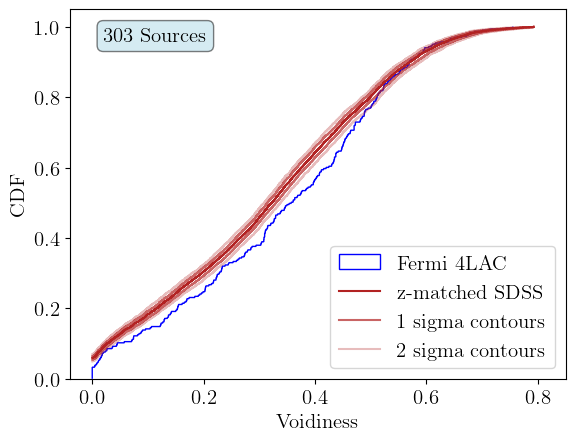

In [143]:
nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (224 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])

ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)

all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')


binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color='firebrick', ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color='firebrick', alpha = 0.7, ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color='firebrick', alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color='firebrick', alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color='firebrick', alpha = 0.3, ds="steps-mid")
plt.xlabel(r'Voidiness')
plt.ylabel(r'CDF')
plt.legend(loc="lower right")
#plt.title(r"4LAC BLL vs SDSS z-matched CDF ($0.1 \leq z < 0.7$)")
plt.text(0.02, 1, '303 Sources',
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))


plt.savefig("sutter_fullredshift.png", dpi = 300, bbox_inches = 'tight')

## CDF for 0.1 <= z < 0.7 - BL Lac Sources

In [101]:
#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSsutter_01-07_z-matched_bll.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_bll.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.1 <= z_4LAC[i] < 0.7:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)


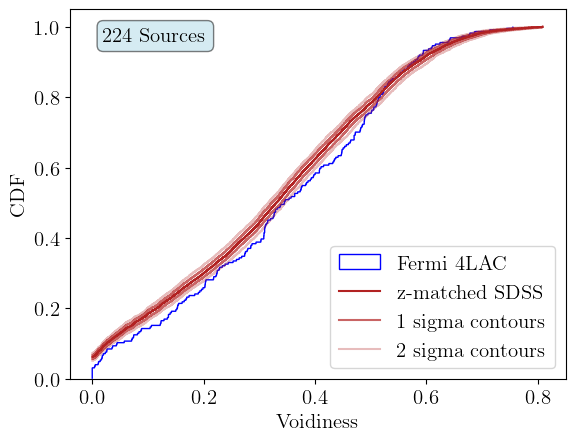

In [105]:
nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (224 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])

ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)

all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')


binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color='firebrick', ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color='firebrick', alpha = 0.7, ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color='firebrick', alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color='firebrick', alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color='firebrick', alpha = 0.3, ds="steps-mid")
plt.xlabel(r'Voidiness')
plt.ylabel(r'CDF')
plt.legend(loc="lower right")
#plt.title(r"4LAC BLL vs SDSS z-matched CDF ($0.1 \leq z < 0.7$)")
plt.text(0.02, 1, '224 Sources',
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))


plt.savefig("sutter_bll_fullredshift.png", dpi = 300, bbox_inches = 'tight')

## CDF's for total intersecting void dist in Mpc - All 4LAC sources

In [114]:
four_lac = pd.read_excel('exported_dataFrames/4lacsutter_w_voidiness_dup_drop_above_z0_1.xlsx')
four_lac

,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Source_Name,DataRelease,RAdeg,DEdeg,...,FluxInc25,FluxInc50,FluxInc60,FluxInc70,FluxInc80,FluxInc90,FluxInc95,FluxInc30,FluxInc40,FluxInc45
0,0,0,0,0,1107,1107,4FGL J0748.6+2400,1,117.163803,24.016600,...,5.405707e-12,2.713846e-12,2.263072e-12,1.940716e-12,1.698744e-12,1.510422e-12,1.431097e-12,4.510846e-12,3.388862e-12,3.014022e-12
1,1,1,1,1,1108,1108,4FGL J0749.2+2314,1,117.321701,23.233700,...,3.649036e-12,1.846592e-12,1.541935e-12,1.323569e-12,1.159380e-12,1.031430e-12,9.774921e-13,3.053028e-12,2.301279e-12,2.049014e-12
2,2,2,2,2,1120,1120,4FGL J0751.4+2655,1,117.866402,26.927500,...,3.910174e-12,1.985120e-12,1.658513e-12,1.424194e-12,1.247888e-12,1.110426e-12,1.052458e-12,3.274994e-12,2.471907e-12,2.201930e-12
3,3,3,3,5,1132,1132,4FGL J0759.6+1321,1,119.900398,13.362700,...,8.132226e-12,4.128582e-12,3.449317e-12,2.961989e-12,2.595316e-12,2.309426e-12,2.188867e-12,6.811208e-12,5.140982e-12,4.579496e-12
4,4,4,4,6,1161,1161,4FGL J0809.3+3121,3,122.348000,31.353300,...,8.035482e-13,4.034177e-13,3.364108e-13,2.884927e-13,2.525235e-13,2.245292e-13,2.127373e-13,6.705342e-13,5.037569e-13,4.480382e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,298,298,322,2534,2534,4FGL J1644.9+2620,1,251.231796,26.346500,...,3.955580e-12,1.992910e-12,1.662877e-12,1.426623e-12,1.249150e-12,1.110947e-12,1.052712e-12,3.304674e-12,2.486385e-12,2.212465e-12
299,299,299,299,323,2542,2542,4FGL J1647.5+2911,1,251.883499,29.183701,...,7.773918e-12,3.968569e-12,3.318754e-12,2.851800e-12,2.500040e-12,2.225528e-12,2.109703e-12,6.522978e-12,4.934809e-12,4.399258e-12
300,300,300,300,324,2553,2553,4FGL J1652.7+4024,1,253.197495,40.405201,...,4.093140e-12,2.060636e-12,1.719166e-12,1.474779e-12,1.291226e-12,1.148306e-12,1.088088e-12,3.418729e-12,2.571377e-12,2.287849e-12
301,301,301,301,326,2567,2567,4FGL J1702.6+3114,1,255.670105,31.246099,...,2.119538e-12,1.063218e-12,8.864962e-13,7.601486e-13,6.653236e-13,5.915326e-13,5.604527e-13,1.768194e-12,1.327942e-12,1.180927e-12


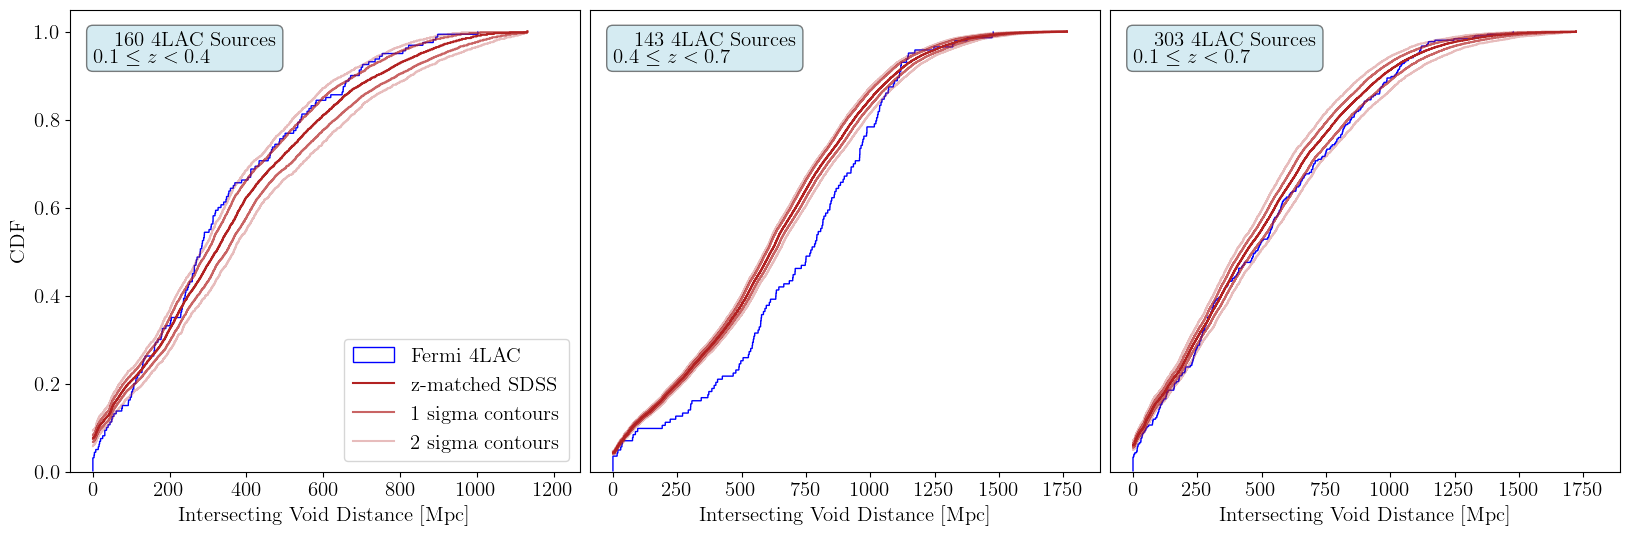

In [133]:
plt.figure(figsize = (20,6))

#LOW REDSHIFT

#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSsutter_01-04_z-matched_voidMpc.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_w_voidiness_dup_drop_above_z0_1.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.1 <= z_4LAC[i] < 0.4:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Void_Dist_Mpc"][i])
Voidiness = np.array(Voidiness)

plt.subplot(1,3,1)

nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (224 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])

ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)

all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="firebrick", ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="firebrick",alpha = 0.7, ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="firebrick",alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="firebrick", alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="firebrick", alpha = 0.3, ds="steps-mid")
plt.xlabel(r'Intersecting Void Distance [Mpc]')
plt.ylabel(r'CDF')
plt.legend(loc="lower right")

plt.text(0.02, 1, r"160 4LAC Sources \\ $0.1 \leq z < 0.4$",
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))
#plt.title(r"$0.1 \leq z < 0.4$", fontsize = 20)


# HIGH REDSHIFT ------------------------------------------------------------------------

#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSsutter_04-07_z-matched_voidMpc.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_w_voidiness_dup_drop_above_z0_1.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.4 <= z_4LAC[i] < 0.7:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Void_Dist_Mpc"][i])
Voidiness = np.array(Voidiness)

plt.subplot(1,3,2)

nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (224 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])

ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)

all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="firebrick", ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="firebrick", alpha = 0.7, ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="firebrick",alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="firebrick", alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="firebrick", alpha = 0.3, ds="steps-mid")
plt.xlabel(r'Intersecting Void Distance [Mpc]')
plt.yticks([]) 
#plt.ylabel(r'CDF')
#plt.legend(loc="lower right")
plt.text(0.02, 1, r"143 4LAC Sources \\ $0.4 \leq z < 0.7$",
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))
#plt.title(r"$0.4 \leq z < 0.7$", fontsize = 20)


# TOTAL REDSHIFT --------------------------------------------------------------------
#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSsutter_01-07_z-matched_voidMpc.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_w_voidiness_dup_drop_above_z0_1.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.1 <= z_4LAC[i] < 0.7:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Void_Dist_Mpc"][i])
Voidiness = np.array(Voidiness)

plt.subplot(1,3,3)

nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (224 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])

ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)

all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="firebrick", ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="firebrick", alpha = 0.7, ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="firebrick", alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="firebrick", alpha = 0.3,  ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="firebrick", alpha = 0.3, ds="steps-mid")
plt.xlabel(r'Intersecting Void Distance [Mpc]')
plt.yticks([]) 
#plt.ylabel(r'CDF')
#plt.legend(loc="lower right")
plt.text(0.02, 1, r"303 4LAC Sources \\ $0.1 \leq z < 0.7$",
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))
#plt.title(r"$0.1 \leq z < 0.7$", fontsize = 20)


plt.subplots_adjust(wspace=0.02, hspace=0.02)

#plt.show()

plt.savefig("sutter_voidMpc.png", dpi = 300, bbox_inches = 'tight')

## CDF's for total intersecting void dist in Mpc - BL Lac sources only

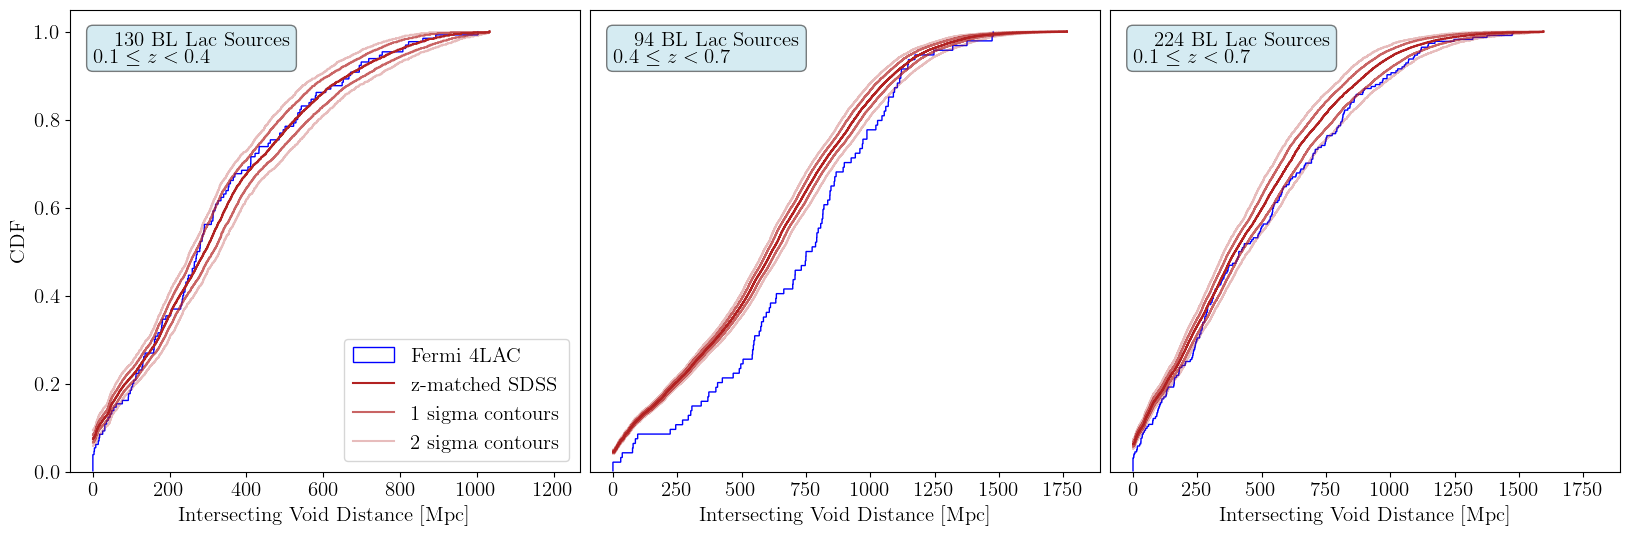

In [134]:
plt.figure(figsize = (20,6))

#LOW REDSHIFT

#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSsutter_01-04_voidMpc_bll.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_bll.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.1 <= z_4LAC[i] < 0.4:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Void_Dist_Mpc"][i])
Voidiness = np.array(Voidiness)

plt.subplot(1,3,1)

nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (224 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])

ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)


all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="firebrick", ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="firebrick", alpha = 0.7, ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="firebrick", alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="firebrick", alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="firebrick", alpha = 0.3, ds="steps-mid")
plt.xlabel(r'Intersecting Void Distance [Mpc]')
plt.ylabel(r'CDF')
plt.legend(loc="lower right")
plt.text(0.02, 1, r'130 BL Lac Sources \\ $0.1 \leq z < 0.4$',
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))
#plt.title(r"$0.1 \leq z < 0.4$", fontsize = 20)


# HIGH REDSHIFT ------------------------------------------------------------------------

#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSsutter_04-07_voidMpc_bll.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_bll.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.4 <= z_4LAC[i] < 0.7:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Void_Dist_Mpc"][i])
Voidiness = np.array(Voidiness)

plt.subplot(1,3,2)

nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (224 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])


ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)


all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="firebrick", ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="firebrick", alpha = 0.7,  ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="firebrick", alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="firebrick",alpha = 0.3,  ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="firebrick",alpha = 0.3, ds="steps-mid")
plt.xlabel(r'Intersecting Void Distance [Mpc]')
#plt.ylabel(r'CDF')
plt.yticks([]) 
#plt.legend(loc="lower right")
plt.text(0.02, 1, r'94 BL Lac Sources \\ $0.4 \leq z < 0.7$',
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))
#plt.title(r"$0.4 \leq z < 0.7$", fontsize = 20)

#TOTAL REDSHIFT -------------------------------------------------

f = fits.open("exported_dataFrames/SDSSsutter_01-07_voidMpc_bll.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_bll.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.1 <= z_4LAC[i] < 0.7:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Void_Dist_Mpc"][i])
Voidiness = np.array(Voidiness)

plt.subplot(1,3,3)

nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (224 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])

ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)


all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="firebrick", ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="firebrick", alpha = 0.7, ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="firebrick", alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="firebrick", alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="firebrick", alpha = 0.3, ds="steps-mid")
plt.xlabel(r'Intersecting Void Distance [Mpc]')
plt.yticks([])
#plt.ylabel(r'CDF')
#plt.legend(loc="lower right")
plt.text(0.02, 1, r'224 BL Lac Sources \\ $0.1 \leq z < 0.7$',
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))
#plt.title(r"$0.1 \leq z < 0.7$", fontsize = 20)



plt.subplots_adjust(wspace=0.02, hspace=0.02)

#plt.show()

plt.savefig("sutter_voidMpc_bll.png", dpi = 300, bbox_inches = 'tight')

# Plots from IGMF Flux Tests

In [76]:
#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("4LAC Flux Adjusted Sources/SDSSsutter_04-07_bll_Flux25.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('4LAC Flux Adjusted Sources/4lacsutter_bll_flux25.xlsx')
z_4LAC = four_lac["z"]
#select only redshifts < 0.4
z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.4 <= z_4LAC[i] < 0.7:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)


In [77]:
len(Voidiness)

61

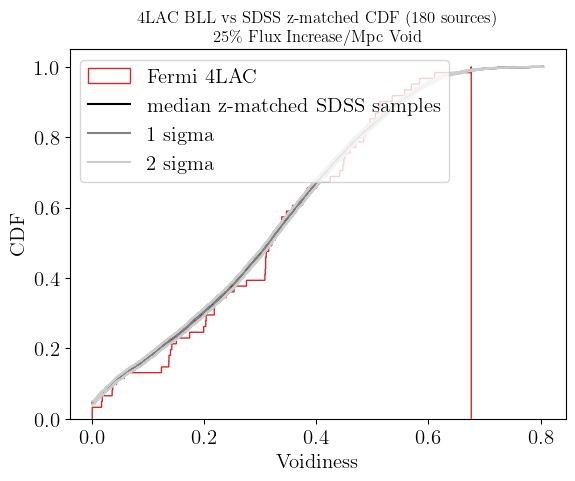

<Figure size 640x480 with 0 Axes>

In [40]:
nbins = 2000
plt.figure("4LAC BLL vs SDSS z-matched CDF (180 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])
plt.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color=cmap(3),label="Fermi 4LAC")


all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="0", ds="steps-mid", label="median z-matched SDSS samples")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="0.5", ds="steps-mid",label="1 sigma")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="0.5", ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="0.8", ds="steps-mid",label="2 sigma")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="0.8", ds="steps-mid")
plt.xlabel(r'Voidiness')
plt.ylabel(r'CDF')
plt.legend(loc="upper left")
plt.title("4LAC BLL vs SDSS z-matched CDF (180 sources) \n 25\% Flux Increase/Mpc Void")
plt.show()

fig2 = plt.gcf()

In [78]:
#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("4LAC Flux Adjusted Sources/SDSSsutter_04-07_bll_Flux70.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('4LAC Flux Adjusted Sources/4lacsutter_bll_flux70.xlsx')
z_4LAC = four_lac["z"]
#select only redshifts < 0.4
z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.4 <= z_4LAC[i] < 0.7:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)



In [79]:
len(Voidiness)

24

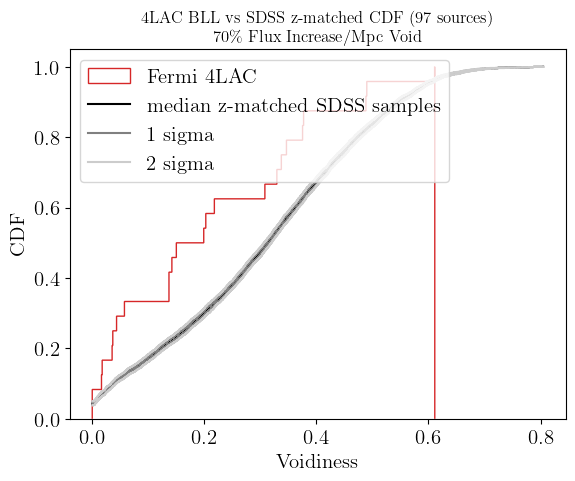

<Figure size 640x480 with 0 Axes>

In [43]:
nbins = 2000
plt.figure("4LAC BLL vs SDSS z-matched CDF (97 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])
plt.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color=cmap(3),label="Fermi 4LAC")


all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="0", ds="steps-mid", label="median z-matched SDSS samples")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="0.5", ds="steps-mid",label="1 sigma")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="0.5", ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="0.8", ds="steps-mid",label="2 sigma")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="0.8", ds="steps-mid")
plt.xlabel(r'Voidiness')
plt.ylabel(r'CDF')
plt.legend(loc="upper left")
plt.title("4LAC BLL vs SDSS z-matched CDF (97 sources) \n 70\% Flux Increase/Mpc Void")
plt.show()

fig3 = plt.gcf()

In [84]:
#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("4LAC Flux Adjusted Sources/SDSSsutter_01-04_bll_Flux25.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('4LAC Flux Adjusted Sources/4lacsutter_bll_flux25.xlsx')
z_4LAC = four_lac["z"]
#select only redshifts < 0.4
z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.1 <= z_4LAC[i] < 0.4:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)


In [85]:
len(Voidiness)

119

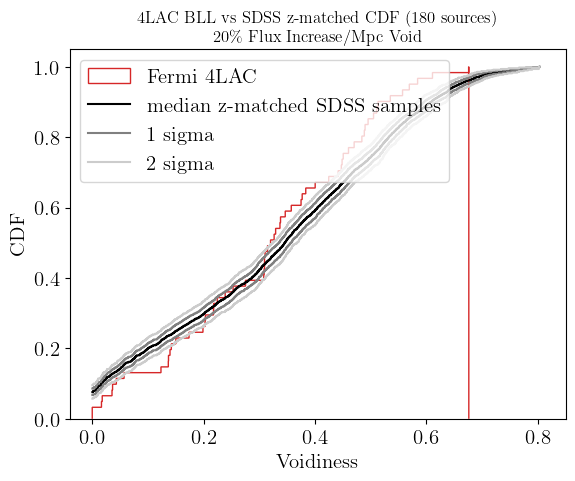

<Figure size 640x480 with 0 Axes>

In [49]:
nbins = 2000
plt.figure("4LAC BLL vs SDSS z-matched CDF (180 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])
plt.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color=cmap(3),label="Fermi 4LAC")


all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="0", ds="steps-mid", label="median z-matched SDSS samples")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="0.5", ds="steps-mid",label="1 sigma")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="0.5", ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="0.8", ds="steps-mid",label="2 sigma")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="0.8", ds="steps-mid")
plt.xlabel(r'Voidiness')
plt.ylabel(r'CDF')
plt.legend(loc="upper left")
plt.title("4LAC BLL vs SDSS z-matched CDF (180 sources) \n 20\% Flux Increase/Mpc Void")
plt.show()

fig5 = plt.gcf()

In [86]:
#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("4LAC Flux Adjusted Sources/SDSSsutter_01-04_bll_Flux70.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('4LAC Flux Adjusted Sources/4lacsutter_bll_flux70.xlsx')
z_4LAC = four_lac["z"]
#select only redshifts < 0.4
z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.1 <= z_4LAC[i] < 0.4:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)


In [87]:
len(Voidiness)

73

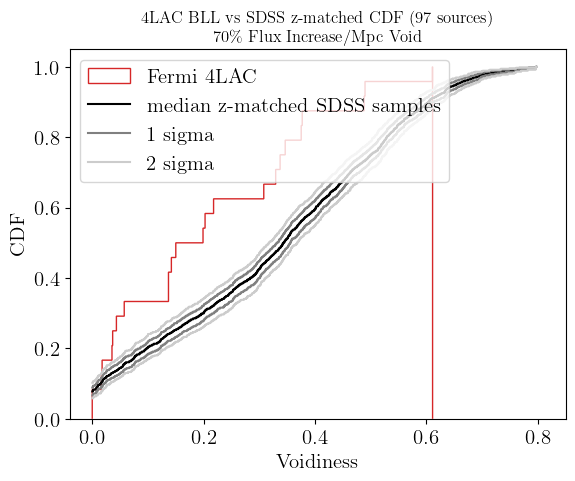

<Figure size 640x480 with 0 Axes>

In [52]:
nbins = 2000
plt.figure("4LAC BLL vs SDSS z-matched CDF (97 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])
plt.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color=cmap(3),label="Fermi 4LAC")


all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="0", ds="steps-mid", label="median z-matched SDSS samples")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="0.5", ds="steps-mid",label="1 sigma")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="0.5", ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="0.8", ds="steps-mid",label="2 sigma")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="0.8", ds="steps-mid")
plt.xlabel(r'Voidiness')
plt.ylabel(r'CDF')
plt.legend(loc="upper left")
plt.title("4LAC BLL vs SDSS z-matched CDF (97 sources) \n 70\% Flux Increase/Mpc Void")
plt.show()

fig6 = plt.gcf()

## CDF Flux Test plot for paper

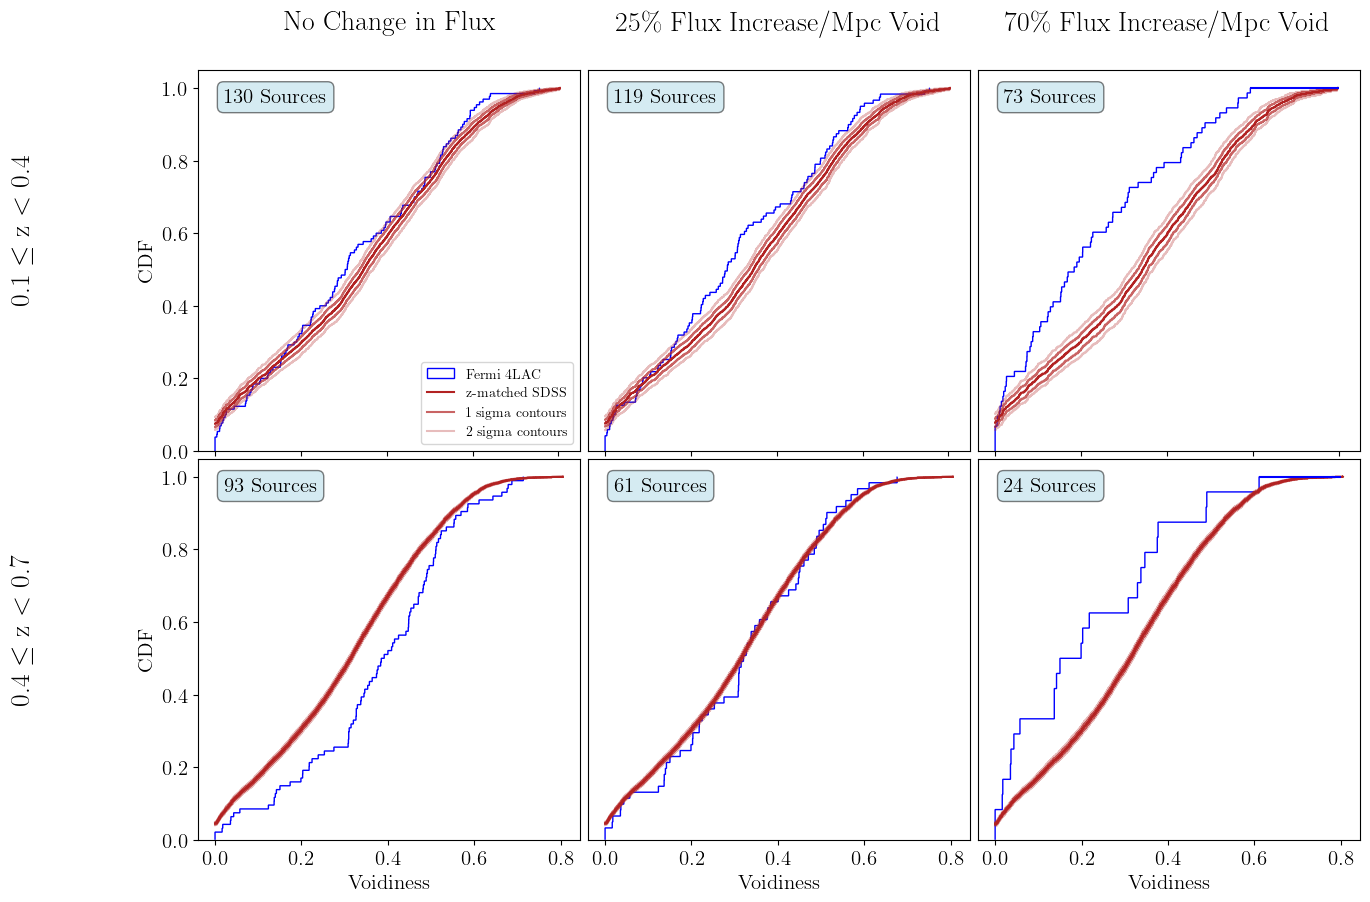

In [141]:
plt.figure(figsize = (15,10))
#------------------------------------------------------------------------------------
plt.subplot(2,3,1)

f = fits.open("exported_dataFrames/SDSSsutter_01-04_z-matched_bll.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_bll.xlsx')
z_4LAC = four_lac["z"]
#select only redshifts < 0.4
z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.1 <= z_4LAC[i] < 0.4:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)

nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (224 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])

ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)

all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="firebrick", ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="firebrick", alpha = 0.7,  ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="firebrick", alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="firebrick", alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="firebrick", alpha = 0.3, ds="steps-mid")
plt.xlabel(r'Voidiness')
plt.ylabel(r'CDF')
plt.legend(loc="lower right", fontsize = 10)
#plt.title("130 BL Lac sources")
plt.text(0.02, 1, '130 Sources',
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))


#--------------------------------------------------------------------

plt.subplot(2,3,2)

f = fits.open("4LAC Flux Adjusted Sources/SDSSsutter_01-04_bll_Flux25.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('4LAC Flux Adjusted Sources/4lacsutter_bll_flux25.xlsx')
z_4LAC = four_lac["z"]
#select only redshifts < 0.4
z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.1 <= z_4LAC[i] < 0.4:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)

nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (180 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])


ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)


all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="firebrick", ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="firebrick", alpha = 0.7,  ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="firebrick", alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="firebrick", alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="firebrick", alpha = 0.3, ds="steps-mid")
plt.xlabel(r'Voidiness')
plt.yticks([])
#plt.ylabel(r'CDF')
#plt.legend(loc="lower right", fontsize = 10)
#plt.title("119 BL Lac sources")
plt.text(0.02, 1, '119 Sources',
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))

#------------------------------------------------------------------------------

plt.subplot(2,3,3)

f = fits.open("4LAC Flux Adjusted Sources/SDSSsutter_01-04_bll_Flux70.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('4LAC Flux Adjusted Sources/4lacsutter_bll_flux70.xlsx')
z_4LAC = four_lac["z"]
#select only redshifts < 0.4
z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.1 <= z_4LAC[i] < 0.4:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)

nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (97 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])


ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)


all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="firebrick", ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="firebrick", alpha = 0.7,  ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="firebrick", alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="firebrick", alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="firebrick", alpha = 0.3, ds="steps-mid")
plt.hlines(y = 1, xmin = max(Voidiness), xmax = 0.8, color = 'b')
plt.xlabel(r'Voidiness')
plt.yticks([])
#plt.ylabel(r'CDF')
#plt.legend(loc="lower right", fontsize = 10)
#plt.title("73 BL Lac sources")
plt.text(0.02, 1, '73 Sources',
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))

#--------------------------------------------------------------------------------
plt.subplot(2,3,4)
f = fits.open("exported_dataFrames/SDSSsutter_04-07_z-matched_bll.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_bll.xlsx')
z_4LAC = four_lac["z"]
#select only redshifts < 0.4
z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.4 <= z_4LAC[i] < 0.7:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)

nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (224 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])


ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)


all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="firebrick", ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="firebrick", alpha = 0.7,  ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="firebrick", alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="firebrick", alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="firebrick", alpha = 0.3, ds="steps-mid")
plt.xlabel(r'Voidiness')
plt.ylabel(r'CDF')
#plt.legend(loc="lower right", fontsize = 10)
#plt.title("93 BL Lac sources")
plt.text(0.02, 1, '93 Sources',
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))

#----------------------------------------------------------------------------
plt.subplot(2,3,5)
f = fits.open("4LAC Flux Adjusted Sources/SDSSsutter_04-07_bll_Flux25.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('4LAC Flux Adjusted Sources/4lacsutter_bll_flux25.xlsx')
z_4LAC = four_lac["z"]
#select only redshifts < 0.4
z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.4 <= z_4LAC[i] < 0.7:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)

nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (180 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])


ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)


all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="firebrick", ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="firebrick", alpha = 0.7, ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="firebrick", alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="firebrick", alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="firebrick", alpha = 0.3, ds="steps-mid")
plt.xlabel(r'Voidiness')
plt.yticks([])
#plt.ylabel(r'CDF')
#plt.legend(loc="lower right", fontsize = 10)
#plt.title("61 BL Lac sources")
plt.text(0.02, 1, '61 Sources',
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))

#------------------------------------------------------------------------------------
plt.subplot(2,3,6)

f = fits.open("4LAC Flux Adjusted Sources/SDSSsutter_04-07_bll_Flux70.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('4LAC Flux Adjusted Sources/4lacsutter_bll_flux70.xlsx')
z_4LAC = four_lac["z"]
#select only redshifts < 0.4
z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.4 <= z_4LAC[i] < 0.7:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)

nbins = 2000
#plt.figure("4LAC BLL vs SDSS z-matched CDF (97 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])


ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)


all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="firebrick", ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="firebrick", alpha = 0.7,  ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="firebrick", alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="firebrick", alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="firebrick", alpha = 0.3, ds="steps-mid")
plt.hlines(y = 1, xmin = max(Voidiness), xmax = 0.8, color = 'b')
plt.xlabel(r'Voidiness')
plt.yticks([])
#plt.ylabel(r'CDF')
#plt.legend(loc="lower right", fontsize = 10)
#plt.title("24 BL Lac sources")
plt.text(0.02, 1, '24 Sources',
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))

# Add row labels using plt.text()
plt.text(-0.0001, 0.65, r"0.1 $\leq$ z $<$ 0.4", fontsize=20, rotation=90, transform=plt.gcf().transFigure)
plt.text(-0.0001, 0.25, r"0.4 $\leq$ z $<$ 0.7", fontsize=20, rotation=90, transform=plt.gcf().transFigure)

# Add column labels
plt.text(-1.4, 2.25, 'No Change in Flux', va='center', ha='center', fontsize=20)
plt.text(-0.5, 2.25, '$25\%$ Flux Increase/Mpc Void', va='center', ha='center', fontsize=20)
plt.text(0.4, 2.25, '$70\%$ Flux Increase/Mpc Void', va='center', ha='center', fontsize=20)

#plt.tight_layout(h_pad = 5.0)
plt.subplots_adjust(wspace=0.02, hspace=0.02)

plt.savefig("sutter_fluxtest.png", dpi = 300, bbox_inches = 'tight')

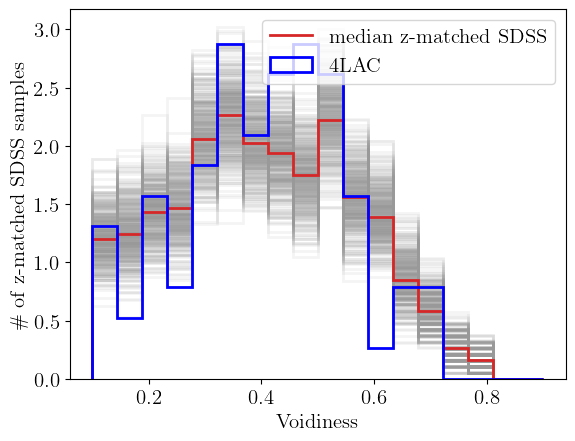

In [63]:
four_lac = pd.read_excel('exported_dataFrames/4lacsutter_bll.xlsx')
z_4LAC = four_lac["z"]
#select only redshifts < 0.4
z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.1<= z_4LAC[i] < 0.4:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)

f = fits.open("exported_dataFrames/SDSSsutter_01-04_z-matched_bll.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns



bin_edges_voids = np.linspace(0.1,0.9,19)
nbins = 499
all_hist = [0] *nbins
COL = [0] *nbins*2
#plt.figure("Voidiness")
#plt.title(r"$0.1 \leq z < 0.4$")
for i in range(nbins):
    #z_matched_SDSS, Voidiness_matched_SDSS = z_matching(z_SDSS_QSO_04, Voidiness_SDSS_QSO_04, norm_hist_z_SDSS, nb_to_keep, bin_edges)
    #COL[i*2] = fits.Column(name='Redshift'+str(i+1), unit= 'z',  format='D', array=z_matched_SDSS)
    #COL[i*2+1] = fits.Column(name='Voidiness'+str(i+1),  format='D', array=Voidiness_matched_SDSS)
    aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=bin_edges_voids,fill=False,density = True, lw=2, alpha = 0.1, color="0.6",histtype='step',zorder=0)
    all_hist[i] = aa[0]
median_voids = np.median(all_hist,axis=0)
plt.stairs(median_voids,edges=bin_edges_voids,lw=2,color=cmap(3),label="median z-matched SDSS",zorder=1)

plt.hist(four_lac[four_lac.z >= 0.4].Voidiness, bins = bin_edges_voids, fill = False, density = True, histtype = 'step', color = 'b', lw = 2, label = "4LAC")


plt.xlabel(r'Voidiness')
plt.ylabel(r'$\#$ of z-matched SDSS samples')
plt.legend(loc = 'upper right')

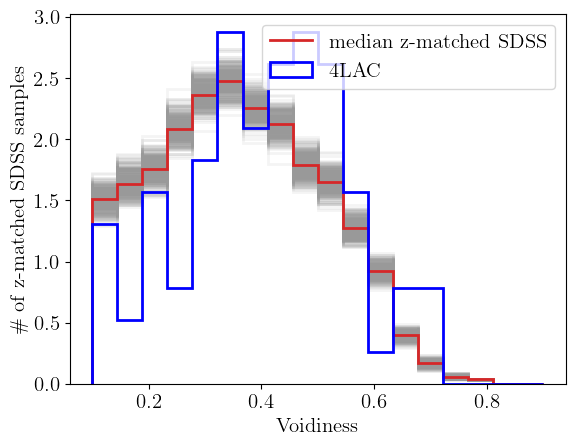

In [64]:
four_lac = pd.read_excel('exported_dataFrames/4lacsutter_bll.xlsx')
z_4LAC = four_lac["z"]
#select only redshifts < 0.4
z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.4<= z_4LAC[i] < 0.8:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)

f = fits.open("exported_dataFrames/SDSSsutter_04-07_z-matched_bll.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns



bin_edges_voids = np.linspace(0.1,0.9,19)
nbins = 499
all_hist = [0] *nbins
COL = [0] *nbins*2
#plt.figure("Voidiness")
#plt.title(r"$0.1 \leq z < 0.4$")
for i in range(nbins):
    #z_matched_SDSS, Voidiness_matched_SDSS = z_matching(z_SDSS_QSO_04, Voidiness_SDSS_QSO_04, norm_hist_z_SDSS, nb_to_keep, bin_edges)
    #COL[i*2] = fits.Column(name='Redshift'+str(i+1), unit= 'z',  format='D', array=z_matched_SDSS)
    #COL[i*2+1] = fits.Column(name='Voidiness'+str(i+1),  format='D', array=Voidiness_matched_SDSS)
    aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=bin_edges_voids,fill=False,density = True, lw=2, alpha = 0.1, color="0.6",histtype='step',zorder=0)
    all_hist[i] = aa[0]
median_voids = np.median(all_hist,axis=0)
plt.stairs(median_voids,edges=bin_edges_voids,lw=2,color=cmap(3),label="median z-matched SDSS",zorder=1)

plt.hist(four_lac[four_lac.z >= 0.4].Voidiness, bins = bin_edges_voids, fill = False, density = True, histtype = 'step', color = 'b', lw = 2, label = "4LAC")


plt.xlabel(r'Voidiness')
plt.ylabel(r'$\#$ of z-matched SDSS samples')
plt.legend(loc = 'upper right')

# Josepf Graveyard

In [2]:
# 12m 36.6s seconds to run. WOW
#filtered_sdss_dr16 = voidy_analysis('exported_dataFrames/voids.xlsx','exported_dataFrames/z_ra_dec_filtered_SDSS_DR16.xlsx') # commented out since its saved and it takes 13 minutes to run
# Saving so i don't have to wait 13 minutes for it to calculate
# This also takes 1m 35s to save. wow
#filtered_sdss_dr16.to_excel('exported_dataFrames/sdss_dr16_w_voidiness.xlsx')

sdss_dr16 = pd.read_excel('exported_dataFrames/sdsssutter_w_voidiness.xlsx')


In [5]:
#doesnt need to be run again
#four_lac = voidy_analysis('exported_dataFrames/voids.xlsx','exported_dataFrames/z_ra_dec_filtered_4lac.xlsx' )
#four_lac.to_excel('exported_dataFrames/4lac_w_voidiness.xlsx', index=False)
#xray_agns = voidy_analysis('exported_dataFrames/voids.xlsx', 'exported_dataFrames/z_ra_dec_filtered_xray_agns.xlsx' )
#xray_agns.to_excel('exported_dataFrames/SBAT104_w_voidiness.xlsx', index = False)
#soft_xrays = voidy_analysis('exported_dataFrames/voids.xlsx','exported_dataFrames/z_ra_dec_filtered_ROMABZCAT.xlsx' )
# soft_xrays.to_excel('exported_dataFrames/ROMABZCAT_w_voidiness.xlsx', index= False)

finished intersections
finished intersections


In [3]:
four_lac = pd.read_excel('exported_dataFrames/4lacsutter_w_voidiness.xlsx')
#sdss = pd.read_excel('exported_dataFrames/sdssdes_w_voidiness.xlsx')

In [4]:
# Base plotting code, the only thing we tweak is the data we're plotting.
# The bins and label

def custom_plot_hist(data, labels, bins, cumulative = False, density=None):

    if density == None:
        density = [True]*len(data)
        
    for dat, label, bin in zip(data, labels, bins):
        plt.hist([dat], 
            bins=bin, 
            histtype="step", 
            density=density, 
            stacked=False,
            label=label,
            cumulative=cumulative)
        
    plt.xlabel('Voidiness [$D_{\\rm Void}/D_{\\rm Total}$]')
    plt.ylabel('Normalized Fraction')
    plt.title('Voidiness Histogram')

    plt.grid()

    plt.legend()

    plt.text(0.5, 0.5, 'Preliminary',  # Adjust the position as needed
                fontsize=30, color='gray', alpha=0.5,
                ha='center', va='center', transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()


In [5]:
four_lac.TeVflag

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
323    NaN
324    NaN
325    1.0
326    NaN
327    NaN
Name: TeVflag, Length: 328, dtype: float64

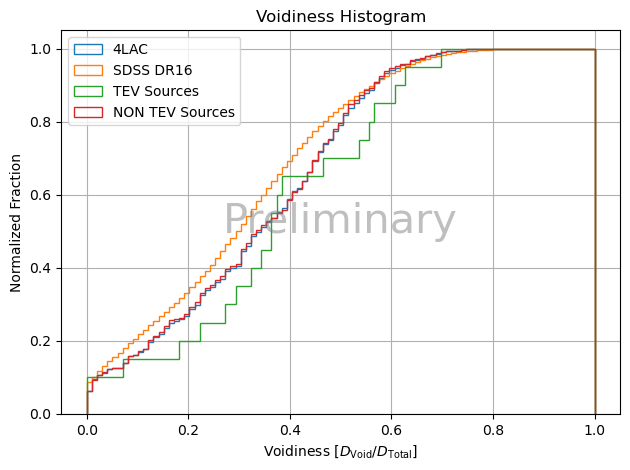

In [7]:
# Everything to be plotted on the histogram will be appended to the master lisst
# if something needs to be changed for a specific histogram, edit the relavent 
# bit of code
VOIDINESS_DATA = [] # list of panda series with voidiness data.
LABELS = []
BINS = []
# density = []

# 4LAC DATA
VOIDINESS_DATA.append(four_lac.Voidiness)
LABELS.append("4LAC")
BINS.append(15)
# density.append(True)

# SDSS DR16 Optical Galaxies
VOIDINESS_DATA.append(sdss_dr16.Voidiness)
LABELS.append("SDSS DR16")
BINS.append(45)
# density.append(True)
'''
# SDSS DR16 Optical Galaxies
VOIDINESS_DATA.append(xray_agns.Voidiness)
LABELS.append("Swift BAT 105 (Hard X-Ray Galaxies)")
BINS.append(15)

# Soft xrays ROMBAZCAT
VOIDINESS_DATA.append(soft_xrays.Voidiness)
LABELS.append("ROMBAZCAT (Soft X-Ray Galaxies)")
BINS.append(17)'''

# TEV Sources
tev_mask = four_lac.TeVflag == 1
VOIDINESS_DATA.append(four_lac.Voidiness[tev_mask])
LABELS.append("TEV Sources")
BINS.append(10)

# Non TEV Sources
VOIDINESS_DATA.append(four_lac.Voidiness[np.isnan(four_lac.TeVflag)])
LABELS.append("NON TEV Sources")
BINS.append(10)
BINS = [np.linspace(0, 1, 100)] * 6
custom_plot_hist(VOIDINESS_DATA, LABELS, BINS, cumulative=True)

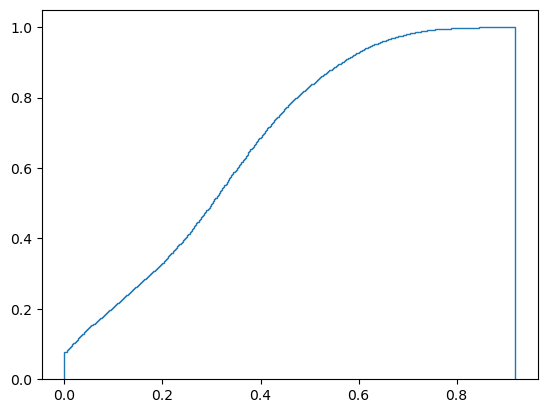

In [9]:
plt.hist([sdss_dr16.Voidiness], 
            bins=400, 
            histtype="step", 
            density=True, 
            stacked=False,
            cumulative=True)
plt.show()
# plt.scatter(centers,test[0])

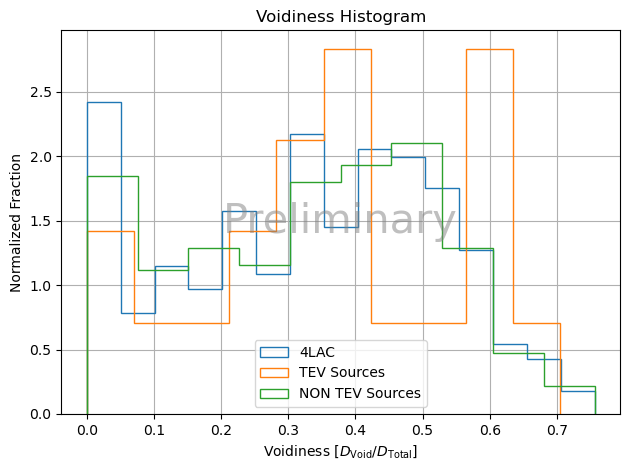

In [10]:
VOIDINESS_DATA = [] # list of panda series with voidiness data.
LABELS = []
BINS = []
# 4LAC DATA
VOIDINESS_DATA.append(four_lac.Voidiness)
LABELS.append("4LAC")
BINS.append(15)

# TEV Sources

VOIDINESS_DATA.append(four_lac.Voidiness[four_lac.TeVflag == 1])
LABELS.append("TEV Sources")
BINS.append(10)

# Non TEV Sources
VOIDINESS_DATA.append(four_lac.Voidiness[np.isnan(four_lac.TeVflag)])
LABELS.append("NON TEV Sources")
BINS.append(10)

custom_plot_hist(VOIDINESS_DATA, LABELS, BINS)

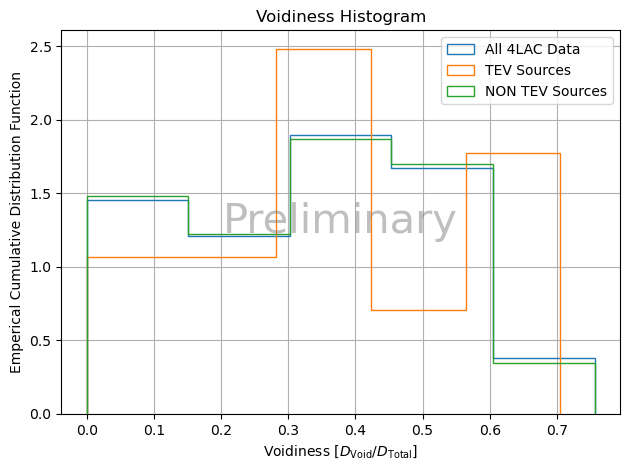

In [11]:
cum_lol = False
bins = 5
# Unormalized
plt.hist([four_lac.Voidiness], 
    bins=bins, 
    histtype="step", 
    density=True, 
    stacked=False,
    label='All 4LAC Data',
    cumulative=cum_lol)

plt.hist([four_lac.Voidiness[four_lac.TeVflag == 1]], 
    bins=bins, 
    histtype="step", 
    density=True, 
    stacked=False,
    label='TEV Sources',
    cumulative=cum_lol)

plt.hist([four_lac.Voidiness[np.isnan(four_lac.TeVflag)]], 
    bins=bins, 
    histtype="step", 
    density=True, 
    stacked=False,
    label='NON TEV Sources',
    cumulative=cum_lol)


plt.xlabel('Voidiness [$D_{\\rm Void}/D_{\\rm Total}$]')
plt.ylabel('Emperical Cumulative Distribution Function')
plt.title('Voidiness Histogram')

plt.grid()

plt.legend()

plt.text(0.5, 0.5, 'Preliminary',  # Adjust the position as needed
            fontsize=30, color='gray', alpha=0.5,
            ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


In [12]:
# Clean the data in the SED_class
for idx in list(four_lac.index):
    data = four_lac.SED_class[idx]
    if type(data) == str:
        four_lac.at[idx, 'SED_class'] = data[2:5] # Grabs the 3 characters, HSP ISP, LSP
# Plottinf just the 4lac distribution then filter by SED_class
# Since the data mixes strings with np.nans i need to do somthing a little messier
hsp_list = []
isp_list = []
lsp_list = []
nan_list = []
for i, _ in four_lac.iterrows():
    dat = four_lac.SED_class[i]
    if type(dat) == str:
        if dat == 'HSP':
            hsp_list.append(i)
        elif dat == 'ISP':
            isp_list.append(i)
        elif dat == 'LSP':
            lsp_list.append(i)
        else:
            Exception(f'Something went wrong. Dat = {dat}')
    elif np.isnan(dat): # last check to be sure
        nan_list.append(i)
    else:
        TypeError

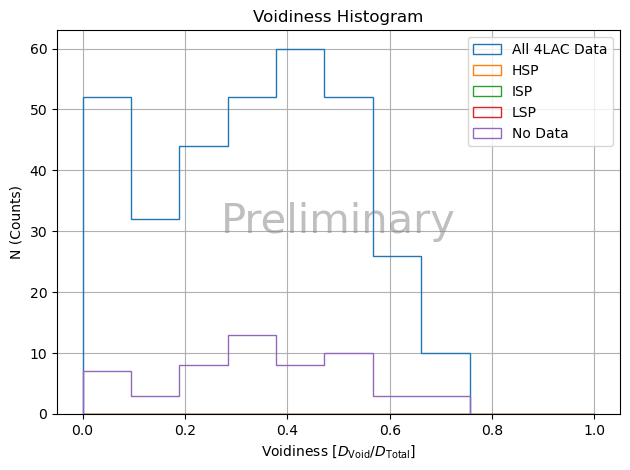

In [13]:
# Unormalized
plt.hist([four_lac.Voidiness], 
    bins=8, 
    histtype="step", 
    density=False, 
    stacked=False,
    label='All 4LAC Data')

plt.hist([four_lac.Voidiness[hsp_list]], 
    bins=8, 
    histtype="step", 
    density=False, 
    stacked=False,
    label='HSP')

plt.hist([four_lac.Voidiness[isp_list]], 
    bins=8, 
    histtype="step", 
    density=False, 
    stacked=False,
    label='ISP')
    
plt.hist([four_lac.Voidiness[lsp_list]], 
    bins=8, 
    histtype="step", 
    density=False, 
    stacked=False,
    label='LSP')

plt.hist([four_lac.Voidiness[nan_list]], 
    bins=8, 
    histtype="step", 
    density=False, 
    stacked=False,
    label='No Data')

plt.xlabel('Voidiness [$D_{\\rm Void}/D_{\\rm Total}$]')
plt.ylabel('N (Counts)')
plt.title('Voidiness Histogram')

plt.grid()

plt.legend()

plt.text(0.5, 0.5, 'Preliminary',  # Adjust the position as needed
            fontsize=30, color='gray', alpha=0.5,
            ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


In [14]:
# Calculating luminosity
four_lac["L1000"] = four_lac.Flux1000 * 4 * np.pi * (four_lac.cmvd_Mpc * 3.08567758128e24)**2

In [15]:

four_lac["Unc_L1000"] = (four_lac.Unc_Flux1000/four_lac.Flux1000)*four_lac.L1000

In [58]:
# # Curve fit
# # https://faculty1.coloradocollege.edu/~sburns/LinearFitting/SimpleDataFittingWithError.html
# # According to this we should use sigma=True
# from scipy.optimize import curve_fit
# from sklearn.metrics import r2_score

# def linear_model(x, a, b):
#     return a * x + b


# popt, pcov = curve_fit(linear_model, four_lac.Voidiness, four_lac.L1000, sigma=four_lac.Unc_L1000)
# slope, intercept = popt
# four_lac['L1000_FIT'] = linear_model(np.array(four_lac.Voidiness), slope, intercept)
# stats_data = {'L1000_FIT_slope': slope, 'L1000_FIT_r2': r2_score(four_lac.L1000, four_lac.L1000_FIT)}


# # popt, pcov = curve_fit(linear_model, four_lac.Voidiness, four_lac.Energy_Flux100, sigma=four_lac.Unc_Energy_Flux100)
# # slope, intercept = popt
# # four_lac['Energy_Flux100_FIT'] = linear_model(np.array(four_lac.Voidiness), slope, intercept)
# # stats_data['Energy_Flux100_FIT_slope'] = slope
# # stats_data['Energy_Flux100_FIT_r2'] = r2_score(four_lac.Energy_Flux100, four_lac.Energy_Flux100_FIT)
# # GRS ONly
# # """Voidines v. Power Law Index PL_Index
# # Voidiness v. Flux
# # """
# key = "L1000"
# plt.errorbar(four_lac.Voidiness, four_lac[key], 
#              yerr=four_lac["Unc_"+key],
#              linestyle='',
#              marker='+',
#              label='4LAC')
# # plt.scatter(four_lac.Voidiness, four_lac[key+"_FIT"], color='orange', label = f"Curve Fit slope: {stats_data[key + '_FIT_slope']:.2e}\n $R^2$: {stats_data[key + '_FIT_r2']:.2e}")
# plt.yscale('log')
# plt.title(f'Voidiness vs. Integral Photon Flux for (1-100 GeV)')
# plt.xlabel("Voidiness [$D_{\\rm Void}/D_{\\rm Total}$]")
# plt.ylabel("Integral Photon Flux [$ s^{-1}$] ")
# plt.grid()
# plt.legend()

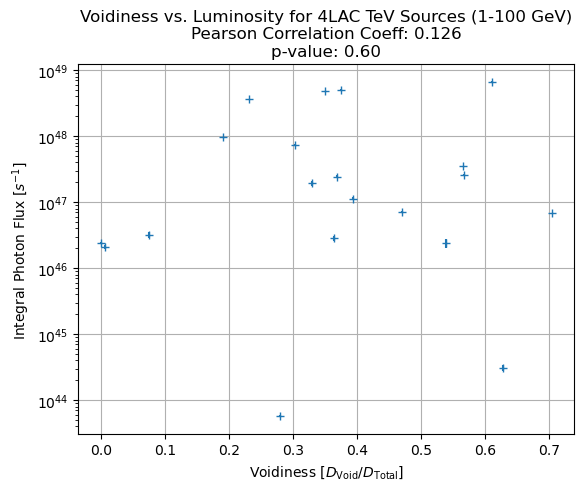

In [16]:
# Curve fit
# https://faculty1.coloradocollege.edu/~sburns/LinearFitting/SimpleDataFittingWithError.html
# According to this we should use sigma=True
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

def linear_model(x, a, b):
    return a * x + b

# tevs_four_lac = four_lac[mask].copy()
# popt, pcov = curve_fit(linear_model, tevs_four_lac.Voidiness, tevs_four_lac.L1000, sigma=tevs_four_lac.Unc_L1000)
# slope, intercept = popt
# tevs_four_lac['L1000_FIT'] = linear_model(np.array(tevs_four_lac.Voidiness), slope, intercept)
# stats_data = {'L1000_FIT_slope': slope, 'L1000_FIT_r2': r2_score(tevs_four_lac.L1000, tevs_four_lac.L1000_FIT)}


# popt, pcov = curve_fit(linear_model, tevs_four_lac.Voidiness, tevs_four_lac.Energy_Flux100, sigma=tevs_four_lac.Unc_Energy_Flux100)
# slope, intercept = popt
# tevs_four_lac['Energy_Flux100_FIT'] = linear_model(np.array(tevs_four_lac.Voidiness), slope, intercept)
# stats_data['Energy_Flux100_FIT_slope'] = slope
# stats_data['Energy_Flux100_FIT_r2'] = r2_score(tevs_four_lac.Energy_Flux100, tevs_four_lac.Energy_Flux100_FIT)
# GRS ONly
# """Voidines v. Power Law Index PL_Index
# Voidiness v. Flux
# """
mask = tev_mask
key = "L1000"
plt.errorbar(four_lac.Voidiness[mask], four_lac.L1000[mask], 
             yerr=four_lac.Unc_L1000[mask],
             linestyle='',
             marker='+',
             label='4LAC')
corr_test= stats.pearsonr(four_lac.Voidiness[mask], four_lac[key][mask])
# plt.scatter(tevs_four_lac.Voidiness, tevs_four_lac[key+"_FIT"], color='orange', label = f"Curve Fit slope: {stats_data[key + '_FIT_slope']:.2e}\n $R^2$: {stats_data[key + '_FIT_r2']:.2e}")
plt.yscale('log')
plt.title(f'Voidiness vs. Luminosity for 4LAC TeV Sources (1-100 GeV)' +
          f"\nPearson Correlation Coeff: {corr_test[0]:.3f}"+
          f"\np-value: {corr_test[1]:.2f}")
plt.xlabel("Voidiness [$D_{\\rm Void}/D_{\\rm Total}$]")
plt.ylabel("Integral Photon Flux [$ s^{-1}$] ")
plt.grid()
# plt.legend()

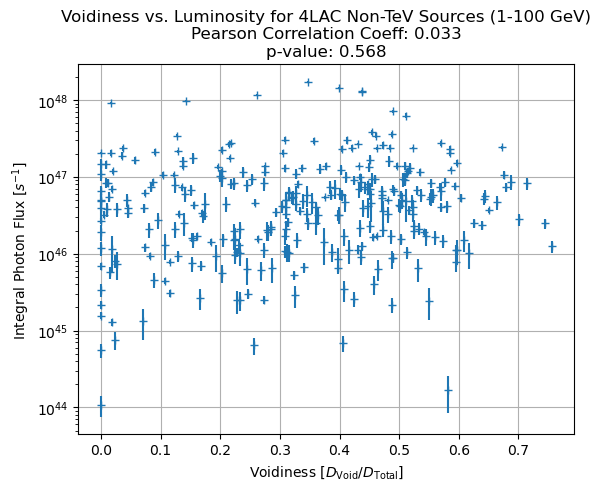

In [17]:
# Curve fit
# https://faculty1.coloradocollege.edu/~sburns/LinearFitting/SimpleDataFittingWithError.html
# According to this we should use sigma=True
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

def linear_model(x, a, b):
    return a * x + b

# tevs_four_lac = four_lac[mask].copy()
# popt, pcov = curve_fit(linear_model, tevs_four_lac.Voidiness, tevs_four_lac.L1000, sigma=tevs_four_lac.Unc_L1000)
# slope, intercept = popt
# tevs_four_lac['L1000_FIT'] = linear_model(np.array(tevs_four_lac.Voidiness), slope, intercept)
# stats_data = {'L1000_FIT_slope': slope, 'L1000_FIT_r2': r2_score(tevs_four_lac.L1000, tevs_four_lac.L1000_FIT)}


# popt, pcov = curve_fit(linear_model, tevs_four_lac.Voidiness, tevs_four_lac.Energy_Flux100, sigma=tevs_four_lac.Unc_Energy_Flux100)
# slope, intercept = popt
# tevs_four_lac['Energy_Flux100_FIT'] = linear_model(np.array(tevs_four_lac.Voidiness), slope, intercept)
# stats_data['Energy_Flux100_FIT_slope'] = slope
# stats_data['Energy_Flux100_FIT_r2'] = r2_score(tevs_four_lac.Energy_Flux100, tevs_four_lac.Energy_Flux100_FIT)
# GRS ONly
# """Voidines v. Power Law Index PL_Index
# Voidiness v. Flux
# """
mask = ~tev_mask
key = "L1000"
plt.errorbar(four_lac.Voidiness[mask], four_lac.L1000[mask], 
             yerr=four_lac.Unc_L1000[mask],
             linestyle='',
             marker='+',
             label='4LAC')
corr_test= stats.pearsonr(four_lac.Voidiness[mask], four_lac[key][mask])
# plt.scatter(tevs_four_lac.Voidiness, tevs_four_lac[key+"_FIT"], color='orange', label = f"Curve Fit slope: {stats_data[key + '_FIT_slope']:.2e}\n $R^2$: {stats_data[key + '_FIT_r2']:.2e}")
plt.yscale('log')
plt.title(f'Voidiness vs. Luminosity for 4LAC Non-TeV Sources (1-100 GeV)' +
          f"\nPearson Correlation Coeff: {corr_test[0]:.3f}"+
          f"\np-value: {corr_test[1]:.3f}")
plt.xlabel("Voidiness [$D_{\\rm Void}/D_{\\rm Total}$]")
plt.ylabel("Integral Photon Flux [$ s^{-1}$] ")
plt.grid()
# plt.legend()

Text(0, 0.5, 'Spectral Index')

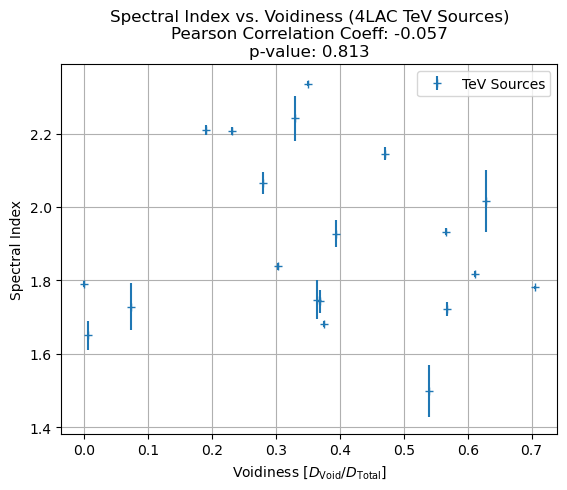

In [18]:

key = "PL_Index"
mask=tev_mask

# popt, pcov = curve_fit(linear_model, four_lac[mask].Voidiness, four_lac[mask].PL_Index, 
#                        sigma=four_lac[mask].Unc_PL_Index, 
#                        absolute_sigma=True)
# slope, intercept = popt
# four_lac[mask]['PL_Index_FIT'] = linear_model(np.array(four_lac[mask].Voidiness), slope, intercept)
# stats_data = {'PL_Index_FIT_slope': slope, 'PL_Index_FIT_r2': r2_score(four_lac[mask].PL_Index, four_lac[mask].PL_Index_FIT)}
# #
# plt.plot(four_lac[mask].Voidiness, four_lac[mask].PL_Index_FIT, marker='o',
#              label = f"Curve Fit slope: {stats_data[key + '_FIT_slope']:.2e}\n $R^2$: {stats_data[key + '_FIT_r2']:.2e}")

plt.errorbar(four_lac[mask].Voidiness, four_lac[mask].PL_Index, 
             yerr=four_lac[mask].Unc_PL_Index, 
             linestyle='', 
             marker = "+",
             label="TeV Sources")

corr_test= stats.pearsonr(four_lac.Voidiness[mask], four_lac[key][mask])

plt.grid()
plt.legend()
# plt.yscale('log')
plt.title("Spectral Index vs. Voidiness (4LAC TeV Sources)" +
          f"\nPearson Correlation Coeff: {corr_test[0]:.3f}"+
          f"\np-value: {corr_test[1]:.3f}")
plt.xlabel("Voidiness [$D_{\\rm Void}/D_{\\rm Total}$]")
plt.ylabel("Spectral Index")

Text(0, 0.5, 'Spectral Index')

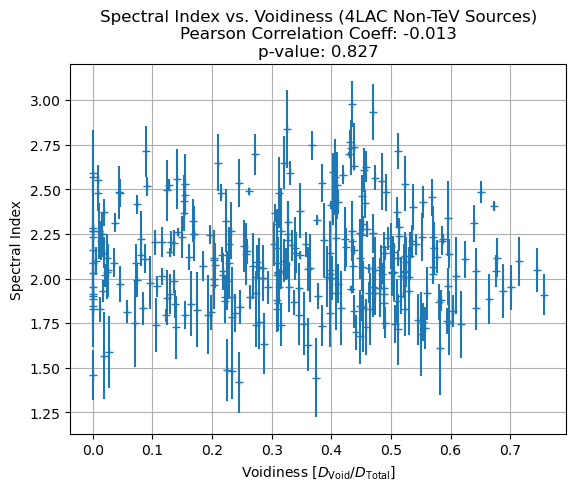

In [19]:

key = "PL_Index"
mask=~tev_mask

# popt, pcov = curve_fit(linear_model, four_lac[mask].Voidiness, four_lac[mask].PL_Index, 
#                        sigma=four_lac[mask].Unc_PL_Index, 
#                        absolute_sigma=True)
# slope, intercept = popt
# four_lac[mask]['PL_Index_FIT'] = linear_model(np.array(four_lac[mask].Voidiness), slope, intercept)
# stats_data = {'PL_Index_FIT_slope': slope, 'PL_Index_FIT_r2': r2_score(four_lac[mask].PL_Index, four_lac[mask].PL_Index_FIT)}
# #
# plt.plot(four_lac[mask].Voidiness, four_lac[mask].PL_Index_FIT, marker='o',
#              label = f"Curve Fit slope: {stats_data[key + '_FIT_slope']:.2e}\n $R^2$: {stats_data[key + '_FIT_r2']:.2e}")

plt.errorbar(four_lac[mask].Voidiness, four_lac[mask].PL_Index, 
             yerr=four_lac[mask].Unc_PL_Index, 
             linestyle='', 
             marker = "+",
             label="TeV Sources")

corr_test= stats.pearsonr(four_lac.Voidiness[mask], four_lac[key][mask])

plt.grid()
# plt.legend()
# plt.yscale('log')
plt.title("Spectral Index vs. Voidiness (4LAC Non-TeV Sources)" +
          f"\nPearson Correlation Coeff: {corr_test[0]:.3f}"+
          f"\np-value: {corr_test[1]:.3f}")
plt.xlabel("Voidiness [$D_{\\rm Void}/D_{\\rm Total}$]")
plt.ylabel("Spectral Index")

In [20]:
# The division

four_lac['Flux1000_EFlux100'] = four_lac.Flux1000/four_lac.Energy_Flux100

# error propagation.
rel_err_1000 = four_lac.Unc_Flux1000/four_lac.Flux1000
rel_err_100 = four_lac.Unc_Energy_Flux100/four_lac.Energy_Flux100
new_rel_error = rel_err_1000 + rel_err_100

four_lac['Unc_Flux1000_EFlux100'] = new_rel_error * four_lac.Flux1000_EFlux100

Text(0, 0.5, 'Flux1000/Energy Flux 100')

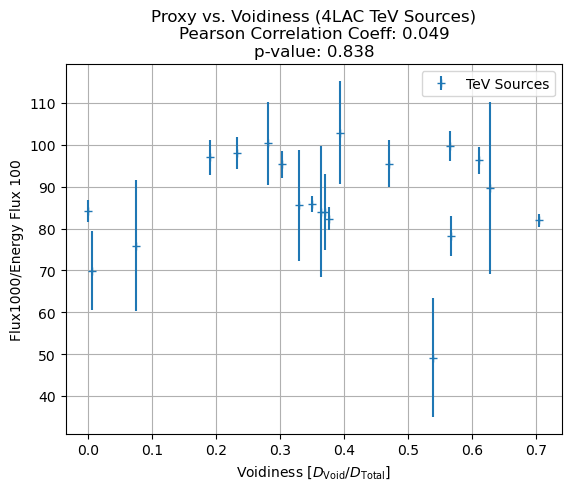

In [21]:

key = "Flux1000_EFlux100"
mask  = tev_mask
# popt, pcov = curve_fit(linear_model, four_lac.Voidiness, four_lac.Flux1000_EFlux100, 
#                        sigma=four_lac.Flux1000_EFlux100, 
#                        absolute_sigma=True)
# slope, intercept = popt
# four_lac['Flux1000_EFlux100_FIT'] = linear_model(np.array(four_lac.Voidiness), slope, intercept)
# stats_data = {'Flux1000_EFlux100_FIT_slope': slope, 'Flux1000_EFlux100_FIT_r2': r2_score(four_lac.Flux1000_EFlux100, four_lac.Flux1000_EFlux100_FIT)}
# #
# plt.plot(four_lac.Voidiness, four_lac.Flux1000_EFlux100_FIT, marker='o',
#              label = f"Curve Fit slope: {stats_data[key + '_FIT_slope']:.2e}\n $R^2$: {stats_data[key + '_FIT_r2']:.2e}")

plt.errorbar(four_lac[mask].Voidiness, four_lac[mask].Flux1000_EFlux100, 
             yerr=four_lac[mask].Unc_Flux1000_EFlux100, 
             linestyle='', 
             marker = "+",
             label="TeV Sources")
corr_test= stats.pearsonr(four_lac.Voidiness[mask], four_lac[key][mask])
plt.grid()
plt.legend()
# plt.yscale('log')
plt.title("Proxy vs. Voidiness (4LAC TeV Sources)"+
          f"\nPearson Correlation Coeff: {corr_test[0]:.3f}"+
          f"\np-value: {corr_test[1]:.3f}")
plt.xlabel("Voidiness [$D_{\\rm Void}/D_{\\rm Total}$]")
plt.ylabel("Flux1000/Energy Flux 100")

Text(0, 0.5, 'Flux1000/Energy Flux 100')

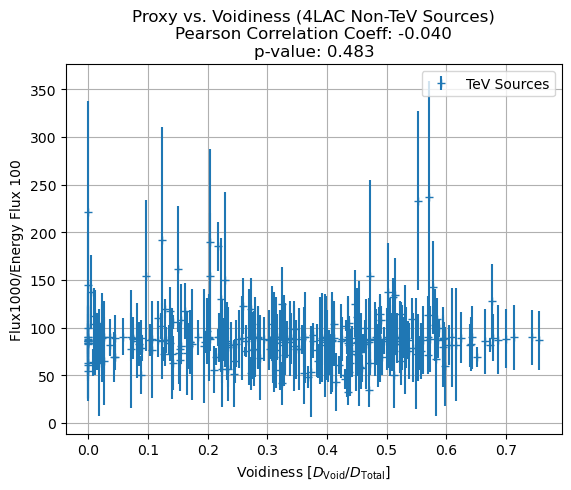

In [22]:

key = "Flux1000_EFlux100"
mask  = ~tev_mask
# popt, pcov = curve_fit(linear_model, four_lac.Voidiness, four_lac.Flux1000_EFlux100, 
#                        sigma=four_lac.Flux1000_EFlux100, 
#                        absolute_sigma=True)
# slope, intercept = popt
# four_lac['Flux1000_EFlux100_FIT'] = linear_model(np.array(four_lac.Voidiness), slope, intercept)
# stats_data = {'Flux1000_EFlux100_FIT_slope': slope, 'Flux1000_EFlux100_FIT_r2': r2_score(four_lac.Flux1000_EFlux100, four_lac.Flux1000_EFlux100_FIT)}
# #
# plt.plot(four_lac.Voidiness, four_lac.Flux1000_EFlux100_FIT, marker='o',
#              label = f"Curve Fit slope: {stats_data[key + '_FIT_slope']:.2e}\n $R^2$: {stats_data[key + '_FIT_r2']:.2e}")

plt.errorbar(four_lac[mask].Voidiness, four_lac[mask].Flux1000_EFlux100, 
             yerr=four_lac[mask].Unc_Flux1000_EFlux100, 
             linestyle='', 
             marker = "+",
             label="TeV Sources")
corr_test= stats.pearsonr(four_lac.Voidiness[mask], four_lac[key][mask])
plt.grid()
plt.legend()
# plt.yscale('log')
plt.title("Proxy vs. Voidiness (4LAC Non-TeV Sources)"+
          f"\nPearson Correlation Coeff: {corr_test[0]:.3f}"+
          f"\np-value: {corr_test[1]:.3f}")
plt.xlabel("Voidiness [$D_{\\rm Void}/D_{\\rm Total}$]")
plt.ylabel("Flux1000/Energy Flux 100")